# Development of video using Matplotlib


In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft import fft, ifft
from scipy.signal import convolve2d

number of processors: 8


In [13]:
# size of figures
%matplotlib inline  

import matplotlib
matplotlib.rcParams['figure.figsize']=(5,4)
matplotlib.rcParams['figure.dpi']=125

## Generates a XZ field and show plots for each z

In [19]:
# Initial parameters
x0 = np.linspace(-250 * um, 250 * um, 1024*1)
z0 = np.linspace(-0.125*um, 750 * um, 1024*2)
wavelength = 0.6238 * um*10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

In [20]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

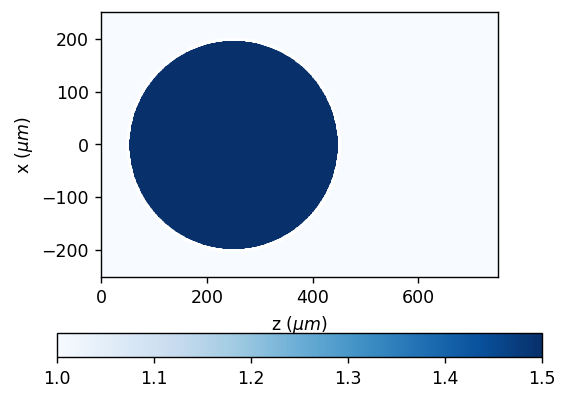

In [21]:
# insert sphere
u1.sphere(r0=(0,250*um), radius=(200*um,200*um),refraction_index=1.5, angle=0)
u1.draw_refraction_index(scale='scaled', colorbar_kind='horizontal');

In [22]:
# propagation 
u1.WPM(verbose=False)

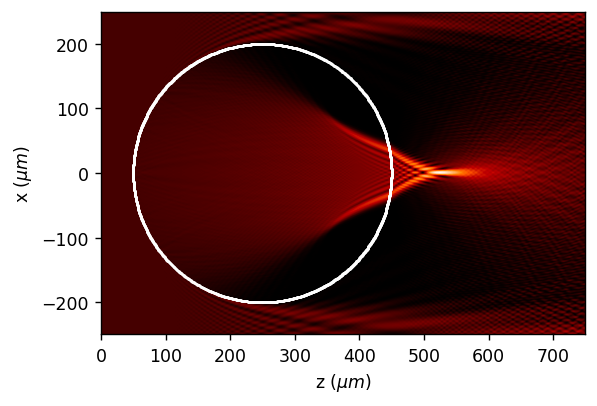

In [23]:
u1.draw(logarithm=True, scale='scaled', draw_borders=True);

In [24]:
seconds=1.
u1.video(kind='intensity',logarithm=True,normalize=False, time_video=10 * seconds, frames_reduction=5,        
         filename='creating_video.mp4', dpi=300)


In [25]:
%%HTML
<div align="middle">
<video width="50%" controls>
      <source src="creating_video.mp4" type="video/mp4">
</video></div>

<div class="alert alert-block alert-danger">
<b>Windows:</b> Perphaps, video generation is not valid for Windows. 
    In this case, you can create the .png figures and use an external program.
</div>